In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dfHD = pd.read_csv("data/raw/healthcare_dataset.csv")
#"data/raw/Drug.csv")
#data/raw/hospital_readmissions.csv")

Dataset Shape: (55500, 15)

Data Types:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Missing Values:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Summary Statistics:
                Age  Billing Amount   Room Number
count  55500.000000    55500.000000

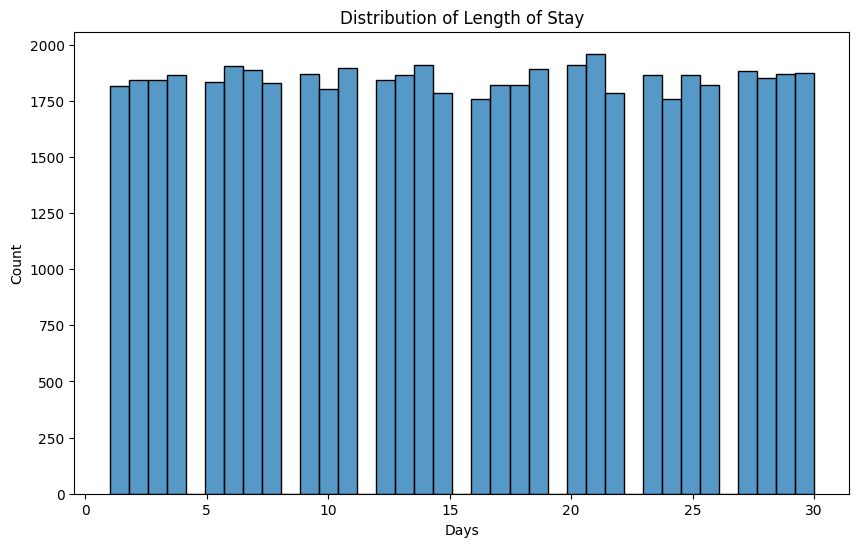

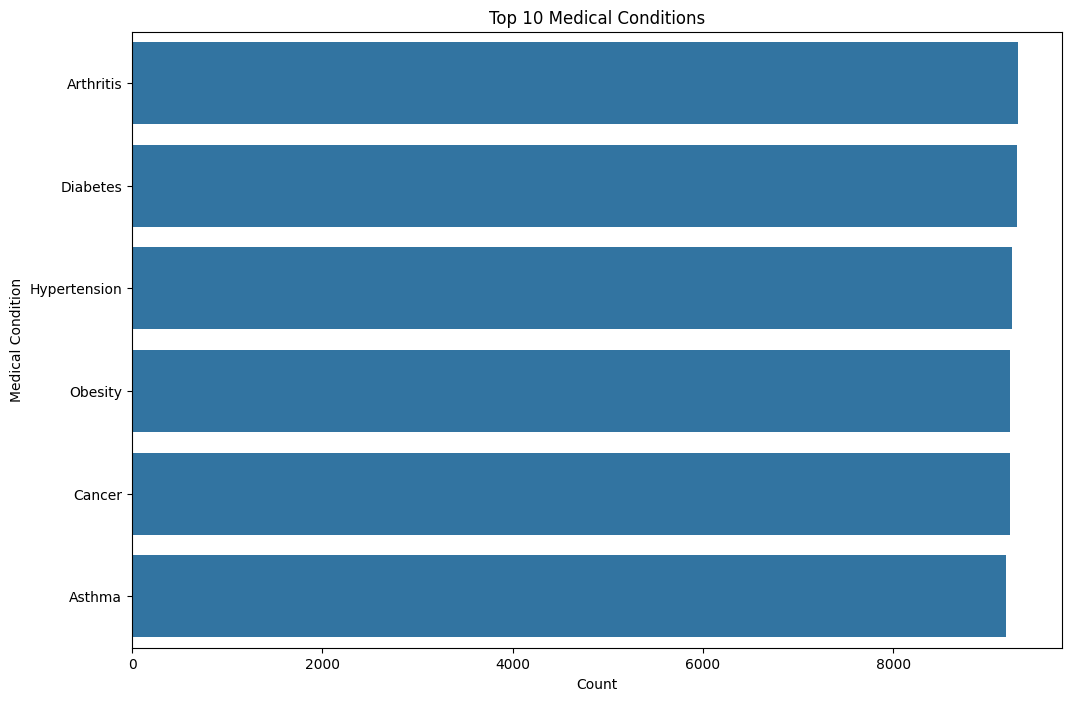

In [ ]:
#dfHD healthcate dataset raw
print("Dataset Shape:", dfHD.shape) #Returns a tuple (how many rows, how many columns)
print("\nData Types:") #Data types of each column
print(dfHD.dtypes)

print("\nMissing Values:")
print(dfHD.isnull().sum())

print("\nSummary Statistics:")
print(dfHD.describe())

# Sample data
print("\nSample Data:")
print(dfHD.head())

dfHD['Date of Admission'] = pd.to_datetime(dfHD['Date of Admission'])
dfHD['Discharge Date'] = pd.to_datetime(dfHD['Discharge Date'])

dfHD['Length of Stay'] = (dfHD['Discharge Date'] - dfHD['Date of Admission']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(dfHD['Length of Stay'])
plt.title('Distribution of Length of Stay')
plt.xlabel('Days')
plt.savefig('length_of_stay_distribution.png')

plt.figure(figsize=(12, 8))
condition_counts = dfHD['Medical Condition'].value_counts().head(10)
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title('Top 10 Medical Conditions')
plt.xlabel('Count')
plt.savefig('top_medical_conditions.png')


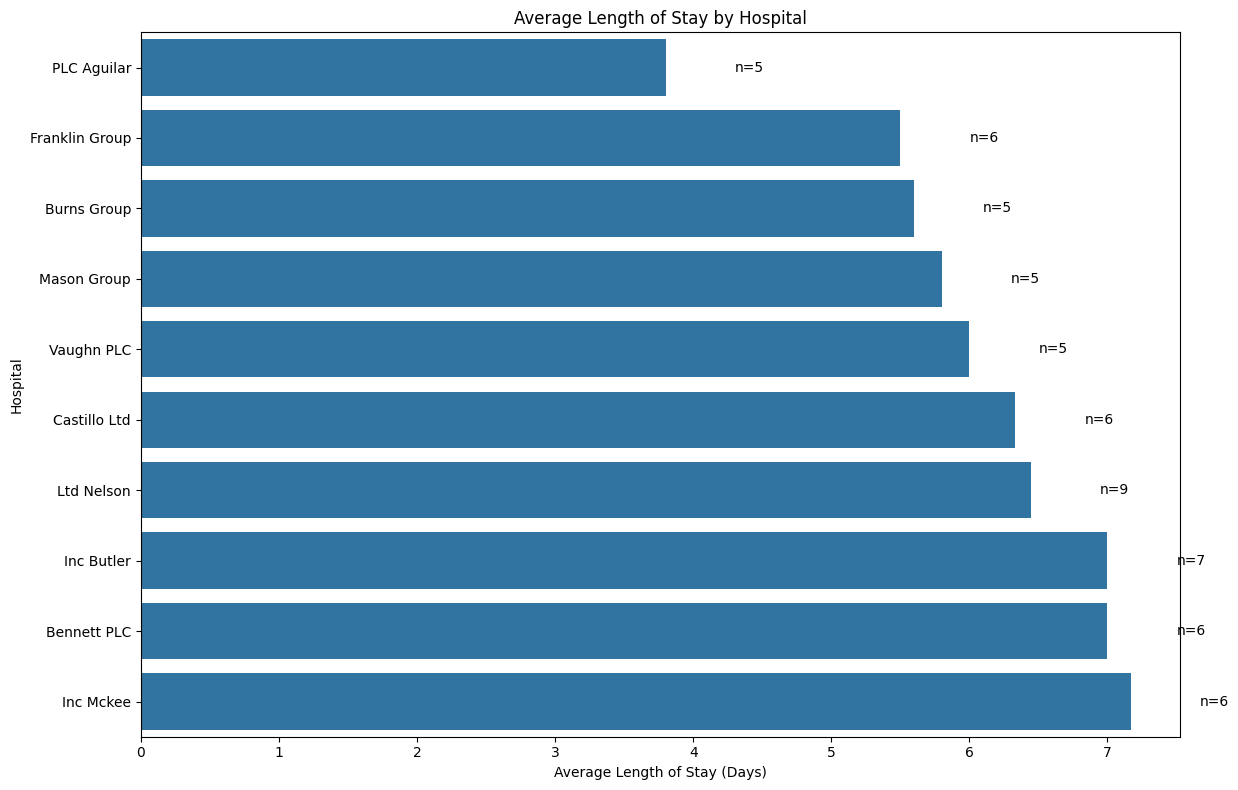

In [ ]:

hospital_avg_stay = dfHD.groupby('Hospital')['Length of Stay'].mean().reset_index()

hospital_avg_stay = hospital_avg_stay.sort_values('Length of Stay', ascending=False)
print(hospital_avg_stay)

top_hospitals = hospital_avg_stay.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='Length of Stay', y='Hospital', data=top_hospitals)
plt.title('Average Length of Stay by Hospital')
plt.xlabel('Average Length of Stay (Days)')
plt.ylabel('Hospital')
plt.tight_layout()
plt.savefig('hospital_avg_stay_length.png')